In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import warnings

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
dataset = pd.read_csv('AAPL2.csv')
df = pd.DataFrame(dataset)
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Close'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1275.045, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1277.005, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1277.001, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1273.053, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1279.044, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.569 seconds


In [5]:
line = pd.to_datetime("2022-09-02", format="%Y-%m-%d")
new_row = pd.DataFrame([line], columns=['Date'], index=[251])
df = pd.concat([df, pd.DataFrame(new_row)], ignore_index=True)

print(df.tail())

          Date        Open        High         Low       Close   Adj Close  \
248 2022-08-29  161.149994  162.899994  159.820007  161.380005  161.380005   
249 2022-08-30  162.130005  162.559998  157.720001  158.910004  158.910004   
250 2022-08-31  160.309998  160.580002  157.139999  157.220001  157.220001   
251 2022-09-01  156.639999  158.419998  154.669998  157.960007  157.960007   
252 2022-09-02         NaN         NaN         NaN         NaN         NaN   

         Volume  
248  73314000.0  
249  77906200.0  
250  87991100.0  
251  74117400.0  
252         NaN  


In [6]:
trainingData = list(df[0: 221]['Close'])
testingData = list(df[221:]['Close'])

In [7]:
modelPredictions = []
warnings.filterwarnings("ignore")
for i in range(len(testingData)):
    model = ARIMA(trainingData, order = (4,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = list(output[0])[0]
    modelPredictions.append(yhat)
    actualTestingData = testingData[i]
    trainingData.append(actualTestingData)
    print(yhat)

153.02593554591573
154.93848890768874
154.15986937191744
153.12332401318744
151.86778485242428
156.90650935866262
156.98961270431107
162.26822601260324
161.63641676727897
159.95858609634286
166.7547151202549
165.56891527487275
165.15413039806648
165.3763962293364
165.07646770161932
169.32267507938647
168.25839703026688
172.09543198598865
173.41927419541597
172.99378802061196
174.8928039636144
174.3105051292874
171.59818026413552
167.85118449111255
167.54530446799555
167.51815788279305
169.80841589148218
163.3835725565579
161.65583938793978
159.39387966467783
156.9387437590876
157.82671897509059


In [8]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  251
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -634.348
Method:                       css-mle   S.D. of innovations              3.029
Date:                Tue, 06 Sep 2022   AIC                           1282.696
Time:                        09:31:01   BIC                           1307.375
Sample:                             1   HQIC                          1292.628
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0132      0.201      0.066      0.948      -0.380       0.406
ar.L1.D.y      0.3218      0.483      0.666      0.505      -0.625       1.268
ar.L2.D.y     -0.0495      0.066     -0.748      0.4

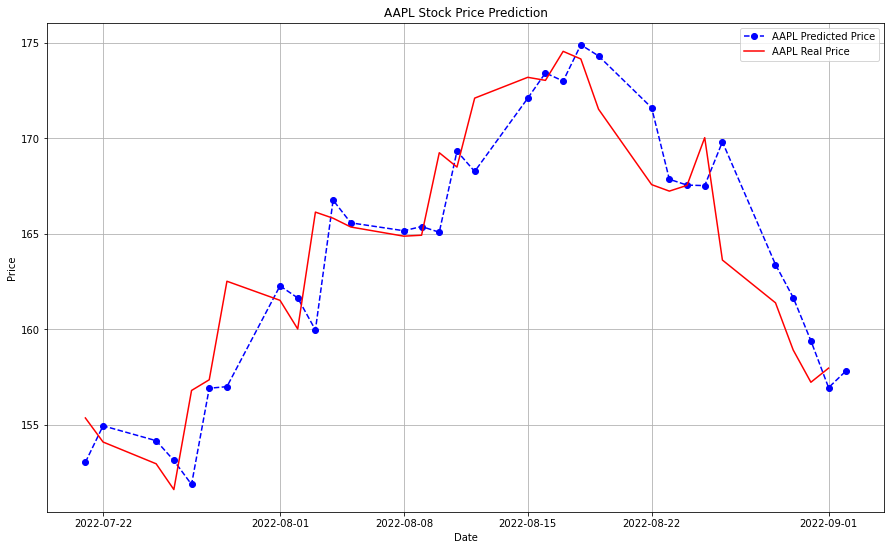

In [9]:

plt.figure(figsize=(15,9))
plt.grid(True)

plt.plot(df['Date'].iloc[-32:], modelPredictions, color='blue', marker = 'o', linestyle = 'dashed', label = 'AAPL Predicted Price')
plt.plot(df['Date'].iloc[-32:], testingData, color='red', label = 'AAPL Real Price')

plt.title('AAPL Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [10]:
print(modelPredictions[-1:])

[157.82671897509059]
